<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA41_41.5%E7%B8%BE%E6%95%88%E7%95%AB%E5%9C%96%E6%AF%94%E8%BC%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# 41.5績效畫圖比較

In [ ]:
#stock_data
df_1 = pd.read_csv('stock_data.csv')
df_1

,TIME,OPEN,MAX,MIN,CLOSE
0,2010-01-04,65.0,65.0,64.0,64.9
1,2010-01-05,65.0,65.1,63.9,64.5
2,2010-01-06,64.5,64.9,63.7,64.9
3,2010-01-07,64.9,65.0,64.2,64.2
4,2010-01-08,63.5,64.3,63.5,64.0
...,...,...,...,...,...
2949,2021-12-24,606.0,609.0,604.0,604.0
2950,2021-12-27,604.0,610.0,604.0,606.0
2951,2021-12-28,610.0,615.0,610.0,615.0
2952,2021-12-29,615.0,619.0,614.0,616.0


In [ ]:
#篩選出2021年度數據
df_1=df_1[df_1['TIME']>='2021-02-01']
df_1.reset_index(drop=True, inplace=True)
df_1

,TIME,OPEN,MAX,MIN,CLOSE
0,2021-02-01,595.0,612.0,587.0,611.0
1,2021-02-02,629.0,638.0,622.0,632.0
2,2021-02-03,638.0,642.0,630.0,630.0
3,2021-02-04,626.0,632.0,620.0,627.0
4,2021-02-05,638.0,641.0,631.0,632.0
...,...,...,...,...,...
219,2021-12-24,606.0,609.0,604.0,604.0
220,2021-12-27,604.0,610.0,604.0,606.0
221,2021-12-28,610.0,615.0,610.0,615.0
222,2021-12-29,615.0,619.0,614.0,616.0


In [ ]:
#計算stock_data日報酬
df_1['日報酬'] = ''
for i in range(1,len(df_1)):
  df_1['日報酬'][i] = df_1['CLOSE'][i]/df_1['CLOSE'][i-1]-1

df_1['1+日報酬'] = ''
for i in range(1,len(df_1)):
  df_1['1+日報酬'][i] = df_1['日報酬'][i]+1

df_1['相乘'] = ''
a = 1
for i in range(1,len(df_1)):  
  a *= df_1['1+日報酬'][i]
  df_1['相乘'][i] = a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
def time(df):
  df['TIME'] = pd.to_datetime(df['TIME'])
  df=df.set_index(df.TIME)
  return df

In [ ]:
df_1=time(df_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#相乘 累積報酬，畫圖畫出曲線變化
df_1

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘
TIME,,,,,,,,
2021-02-01,2021-02-01,595.0,612.0,587.0,611.0,,,
2021-02-02,2021-02-02,629.0,638.0,622.0,632.0,0.03437,1.03437,1.03437
2021-02-03,2021-02-03,638.0,642.0,630.0,630.0,-0.003165,0.996835,1.031097
2021-02-04,2021-02-04,626.0,632.0,620.0,627.0,-0.004762,0.995238,1.026187
2021-02-05,2021-02-05,638.0,641.0,631.0,632.0,0.007974,1.007974,1.03437
...,...,...,...,...,...,...,...,...
2021-12-24,2021-12-24,606.0,609.0,604.0,604.0,-0.0033,0.9967,0.988543
2021-12-27,2021-12-27,604.0,610.0,604.0,606.0,0.003311,1.003311,0.991817
2021-12-28,2021-12-28,610.0,615.0,610.0,615.0,0.014851,1.014851,1.006547


In [ ]:
#匯入RL訓練出來的結果
rl_1 =pd.read_csv('1.csv')
rl_1

,Unnamed: 0,state,action,reward,q
0,2710,OPEN MAX MIN CLOSE\nTIME ...,0,0.000000,0.000000
1,2711,OPEN MAX MIN CLOSE\nTIME ...,0,0.000000,0.000000
2,2712,OPEN MAX MIN CLOSE\nTIME ...,0,0.000000,0.000000
3,2713,OPEN MAX MIN CLOSE\nTIME ...,0,0.000000,0.000000
4,2714,OPEN MAX MIN CLOSE\nTIME ...,0,0.000000,0.000000
...,...,...,...,...,...
219,2929,OPEN MAX MIN CLOSE\nTIME ...,0,-0.003300,-0.003300
220,2930,OPEN MAX MIN CLOSE\nTIME ...,0,0.003311,0.003311
221,2931,OPEN MAX MIN CLOSE\nTIME ...,0,0.014851,0.014851
222,2932,OPEN MAX MIN CLOSE\nTIME ...,0,0.001626,0.001626


In [ ]:
rl_2 = df_1.copy()
rl_2

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘
TIME,,,,,,,,
2021-02-01,2021-02-01,595.0,612.0,587.0,611.0,,,
2021-02-02,2021-02-02,629.0,638.0,622.0,632.0,0.03437,1.03437,1.03437
2021-02-03,2021-02-03,638.0,642.0,630.0,630.0,-0.003165,0.996835,1.031097
2021-02-04,2021-02-04,626.0,632.0,620.0,627.0,-0.004762,0.995238,1.026187
2021-02-05,2021-02-05,638.0,641.0,631.0,632.0,0.007974,1.007974,1.03437
...,...,...,...,...,...,...,...,...
2021-12-24,2021-12-24,606.0,609.0,604.0,604.0,-0.0033,0.9967,0.988543
2021-12-27,2021-12-27,604.0,610.0,604.0,606.0,0.003311,1.003311,0.991817
2021-12-28,2021-12-28,610.0,615.0,610.0,615.0,0.014851,1.014851,1.006547


In [ ]:
#計算stock_data日報酬
rl_2['rl_reward'] = ''

for i in range(224):
  rl_2['rl_reward'][i] = rl_1.reward[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
rl_2

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘,rl_reward
TIME,,,,,,,,,
2021-02-01,2021-02-01,595.0,612.0,587.0,611.0,,,,0.0
2021-02-02,2021-02-02,629.0,638.0,622.0,632.0,0.03437,1.03437,1.03437,0.0
2021-02-03,2021-02-03,638.0,642.0,630.0,630.0,-0.003165,0.996835,1.031097,0.0
2021-02-04,2021-02-04,626.0,632.0,620.0,627.0,-0.004762,0.995238,1.026187,0.0
2021-02-05,2021-02-05,638.0,641.0,631.0,632.0,0.007974,1.007974,1.03437,0.0
...,...,...,...,...,...,...,...,...,...
2021-12-24,2021-12-24,606.0,609.0,604.0,604.0,-0.0033,0.9967,0.988543,-0.0033
2021-12-27,2021-12-27,604.0,610.0,604.0,606.0,0.003311,1.003311,0.991817,0.003311
2021-12-28,2021-12-28,610.0,615.0,610.0,615.0,0.014851,1.014851,1.006547,0.014851


In [ ]:
rl_2['1+rl日報酬'] = ''
for i in range(0,len(rl_2)):
  rl_2['1+rl日報酬'][i] = rl_2['rl_reward'][i]+1

rl_2['rl相乘'] = ''
a = 1
for i in range(0,len(rl_2)):  
  a *= rl_2['1+rl日報酬'][i]
  rl_2['rl相乘'][i] = a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
rl_2

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘,rl_reward,1+rl日報酬,rl相乘
TIME,,,,,,,,,,,
2021-02-01,2021-02-01,595.0,612.0,587.0,611.0,,,,0.0,1.0,1.0
2021-02-02,2021-02-02,629.0,638.0,622.0,632.0,0.03437,1.03437,1.03437,0.0,1.0,1.0
2021-02-03,2021-02-03,638.0,642.0,630.0,630.0,-0.003165,0.996835,1.031097,0.0,1.0,1.0
2021-02-04,2021-02-04,626.0,632.0,620.0,627.0,-0.004762,0.995238,1.026187,0.0,1.0,1.0
2021-02-05,2021-02-05,638.0,641.0,631.0,632.0,0.007974,1.007974,1.03437,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2021-12-24,606.0,609.0,604.0,604.0,-0.0033,0.9967,0.988543,-0.0033,0.9967,1.015126
2021-12-27,2021-12-27,604.0,610.0,604.0,606.0,0.003311,1.003311,0.991817,0.003311,1.003311,1.018487
2021-12-28,2021-12-28,610.0,615.0,610.0,615.0,0.014851,1.014851,1.006547,0.014851,1.014851,1.033613


In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
#某列更換成數值類型_使用pd.to_numeric
df_1['相乘']=pd.to_numeric(df_1['相乘'])
rl_2['rl相乘']=pd.to_numeric(rl_2['rl相乘'])

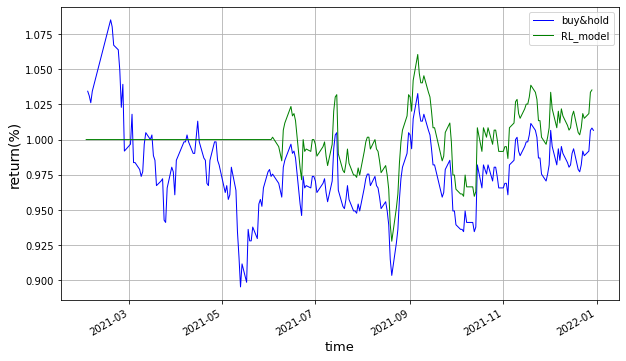

In [ ]:
plt.figure(figsize = (10,6))
plt.title('', fontsize = 16)
df_1.相乘.plot(color = 'blue', linewidth = 1)
rl_2.rl相乘.plot(color = 'green', linewidth = 1)

plt.grid()
plt.xlabel('time', fontsize = 13) # X座標名稱
plt.ylabel('return(%)', fontsize = 14) # Y座標名稱
plt.legend(['buy&hold','RL_model'],  bbox_to_anchor=(1, 1));
plt.savefig('績效圖.png') # 儲存圖片;